# **CASE: SATISFAÇÃO EM RESTAURANTE**

---

### Instalação de bibliotecas

In [1]:
# # Para geração de correlograma
# install.packages("GGally")
# # Para cálculo do VIF
# install.packages("car")

### Carregamento de bibliotecas

In [2]:
library(GGally)
library(car)

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: carData



### Leitura da base de dados

In [3]:
dados_restaurante <- read.table(file   = "../Dados/Satisfacao_Restaurante.txt",
                                sep    = "\t",
                                dec    = ".",
                                header = TRUE)

### Visualização da base de dados

In [4]:
View(dados_restaurante)

ID_UNIDADE,FLAG_LITORAL,TEMPO_MED_ESPERA,VALOR_MED_CONTA,NOTA_MED_COMIDA,NOTA_MED_ATENDIMENTO,NOTA_MED_AMBIENTE,QTDE_MED_CLIENTES,QTDE_CLIENTES_DEZ
<chr>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>
Unidade Aeroporto (SP),0,25,131.1,9,7,10,2960,3470
Unidade Água Branca (SP),0,27,189.3,9,7,10,3200,2700
Unidade Alto de Pinheiros (SP),0,18,192.0,9,10,10,3640,9250
Unidade Barra da Tijuca (RJ),1,18,256.1,9,8,9,3760,12210
Unidade Bela Vista (SP),0,24,174.0,9,9,9,6200,9040
Unidade Belvedere (BH),0,20,211.4,9,7,6,3500,1920
Unidade Bertioga (SP),1,29,210.4,9,9,9,1040,2830
Unidade Botafogo (RJ),1,24,174.0,9,10,9,4180,14240
Unidade Brooklin (SP),0,22,166.0,10,6,10,4640,9010


### Análise exploratória breve

In [5]:
# Medidas resumo
summary(dados_restaurante)

  ID_UNIDADE         FLAG_LITORAL    TEMPO_MED_ESPERA VALOR_MED_CONTA
 Length:60          Min.   :0.0000   Min.   :16.00    Min.   : 93.4  
 Class :character   1st Qu.:0.0000   1st Qu.:21.00    1st Qu.:139.3  
 Mode  :character   Median :0.0000   Median :24.00    Median :167.4  
                    Mean   :0.2833   Mean   :24.60    Mean   :167.2  
                    3rd Qu.:1.0000   3rd Qu.:28.25    3rd Qu.:189.6  
                    Max.   :1.0000   Max.   :34.00    Max.   :256.1  
 NOTA_MED_COMIDA NOTA_MED_ATENDIMENTO NOTA_MED_AMBIENTE QTDE_MED_CLIENTES
 Min.   : 5.0    Min.   : 6.000       Min.   : 6.00     Min.   : 920     
 1st Qu.: 8.0    1st Qu.: 7.000       1st Qu.: 9.00     1st Qu.:2135     
 Median : 9.0    Median : 9.000       Median : 9.00     Median :3090     
 Mean   : 8.7    Mean   : 8.467       Mean   : 8.95     Mean   :3134     
 3rd Qu.:10.0    3rd Qu.:10.000       3rd Qu.:10.00     3rd Qu.:3900     
 Max.   :10.0    Max.   :10.000       Max.   :10.00     Max.   :68

In [6]:
# Tabela de frequências
table(dados_restaurante$FLAG_LITORAL)
prop.table(table(dados_restaurante$FLAG_LITORAL))


 0  1 
43 17 


        0         1 
0.7166667 0.2833333 

### Análise bivariada: variável resposta vs. variáveis explicativas

In [7]:
# Comando auxiliar para aumentar resolução do gráfico (recomendado apenas no Colab)
reset_options <- options()
options(repr.plot.width = 15, repr.plot.height = 15)

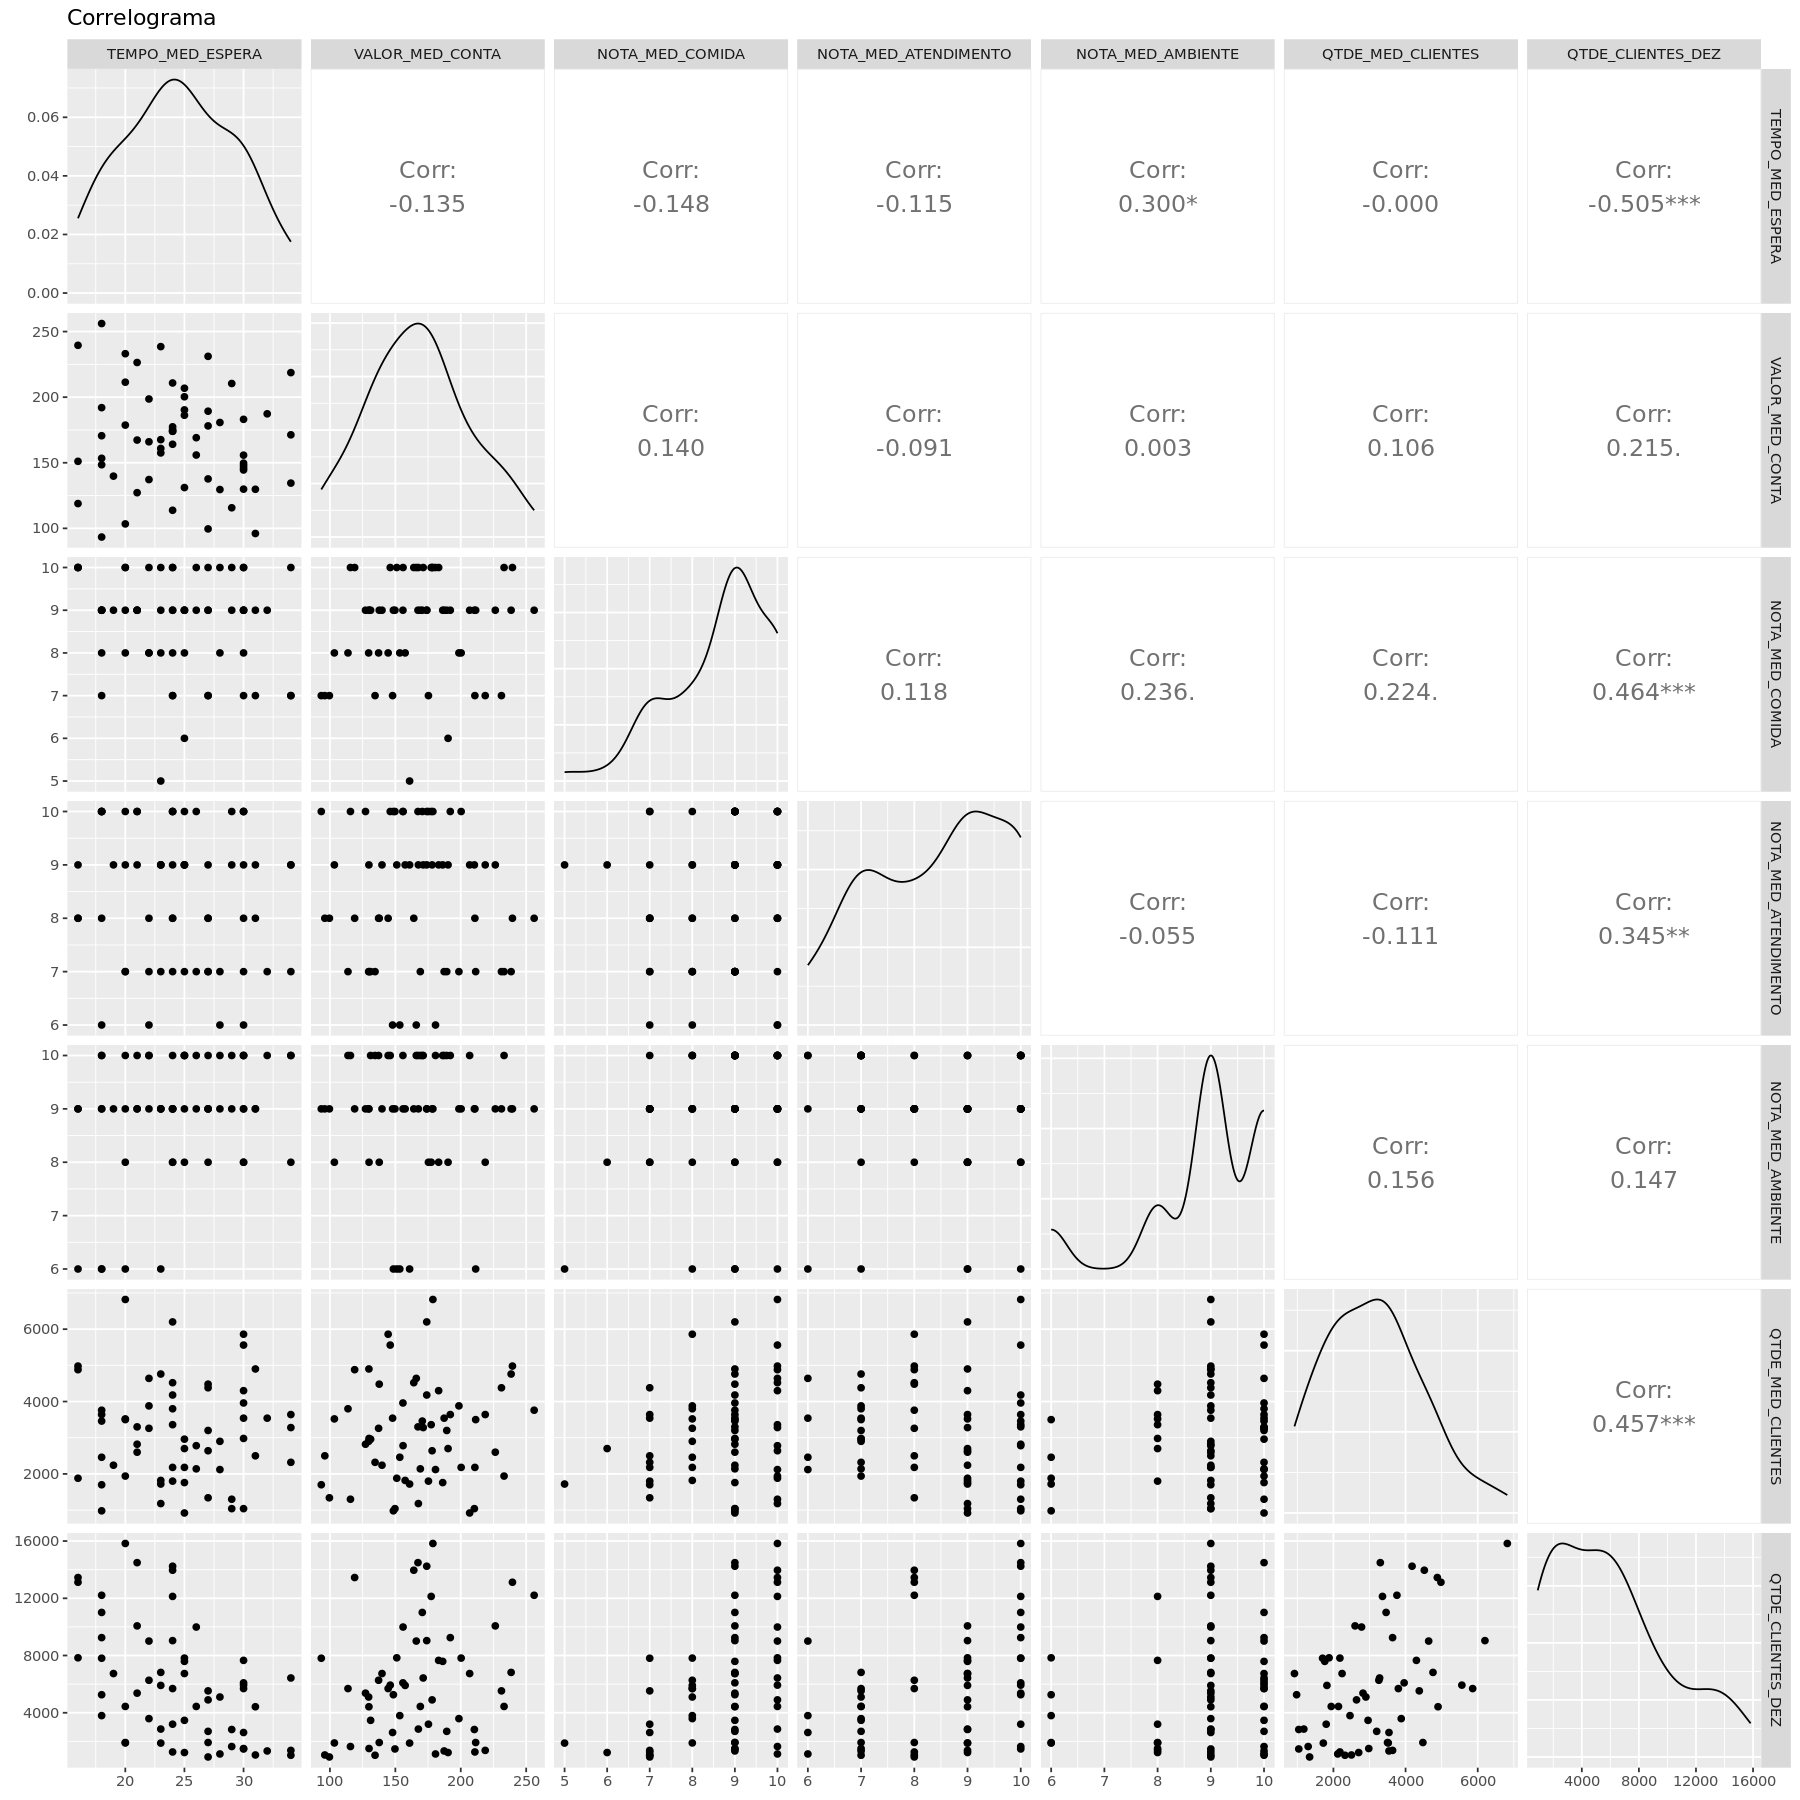

In [8]:
# Correlograma
ggpairs(dados_restaurante[, !names(dados_restaurante) %in% c("ID_UNIDADE", "FLAG_LITORAL")],
        title = "Correlograma",
        upper = list(continuous = wrap("cor", size = 5)))

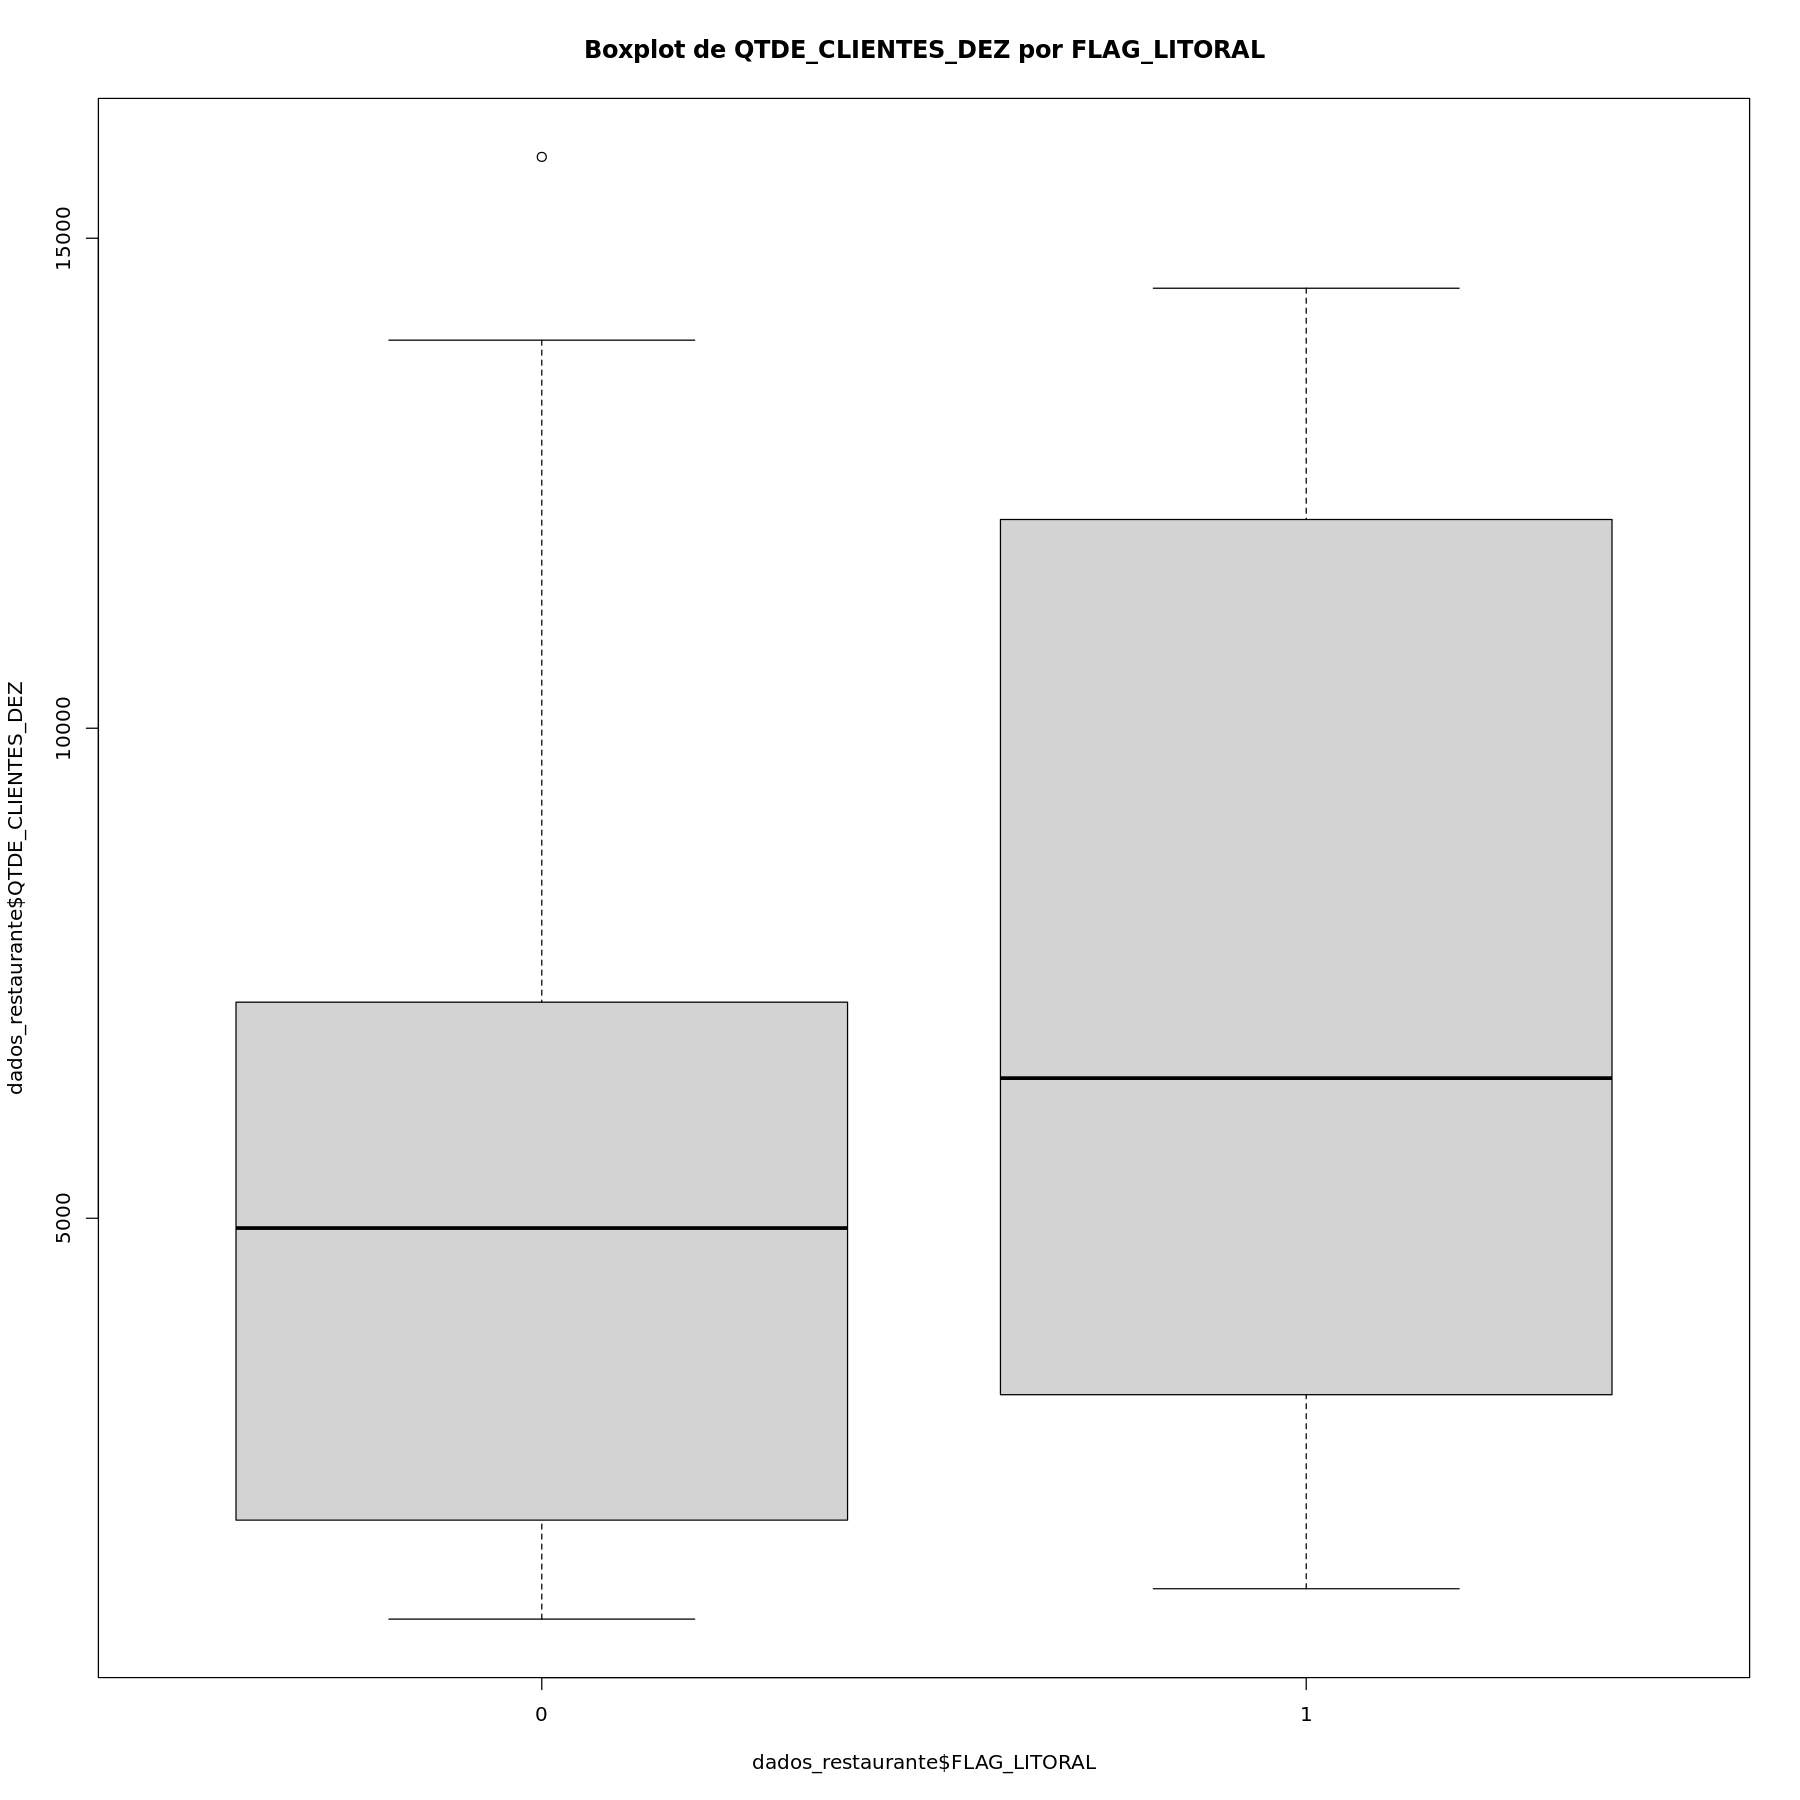

In [9]:
# Boxplot para variável qualitativa FLAG_LITORAL
boxplot(dados_restaurante$QTDE_CLIENTES_DEZ ~ dados_restaurante$FLAG_LITORAL,
        main = "Boxplot de QTDE_CLIENTES_DEZ por FLAG_LITORAL")

In [10]:
# Resetando parâmetros gráficos (recomendado apenas no Colab)
options(reset_options)

### Modelo de regressão linear múltipla

In [11]:
# Comando auxiliar para para omitir notação científica nos p-valores e controlar largura dos outputs na tela do Colab
options(scipen = 999, width = 200)

In [12]:
# Ajuste do modelo 1: inicial
regressao_1 <- lm(QTDE_CLIENTES_DEZ ~
                  FLAG_LITORAL +
                  TEMPO_MED_ESPERA +
                  VALOR_MED_CONTA +
                  NOTA_MED_COMIDA +
                  NOTA_MED_ATENDIMENTO +
                  NOTA_MED_AMBIENTE +
                  QTDE_MED_CLIENTES,
                data = dados_restaurante)

summary(regressao_1)


Call:
lm(formula = QTDE_CLIENTES_DEZ ~ FLAG_LITORAL + TEMPO_MED_ESPERA + 
    VALOR_MED_CONTA + NOTA_MED_COMIDA + NOTA_MED_ATENDIMENTO + 
    NOTA_MED_AMBIENTE + QTDE_MED_CLIENTES, data = dados_restaurante)

Residuals:
    Min      1Q  Median      3Q     Max 
-4578.9 -1587.1    -6.2  1294.8  5891.1 

Coefficients:
                        Estimate  Std. Error t value     Pr(>|t|)    
(Intercept)          -10729.5513   3870.9826  -2.772     0.007718 ** 
FLAG_LITORAL           2434.5736    702.9152   3.464     0.001076 ** 
TEMPO_MED_ESPERA       -415.3198     64.1262  -6.477 0.0000000338 ***
VALOR_MED_CONTA           2.4486      8.0612   0.304     0.762530    
NOTA_MED_COMIDA         969.7257    277.2112   3.498     0.000969 ***
NOTA_MED_ATENDIMENTO    795.4803    239.6657   3.319     0.001655 ** 
NOTA_MED_AMBIENTE       759.9972    282.1038   2.694     0.009482 ** 
QTDE_MED_CLIENTES         1.2087      0.2165   5.582 0.0000008716 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 

In [13]:
# Ajuste do modelo 2: retirando VALOR_MED_CONTA
regressao_2 <- lm(QTDE_CLIENTES_DEZ ~
                  FLAG_LITORAL +
                  TEMPO_MED_ESPERA +
                  NOTA_MED_COMIDA +
                  NOTA_MED_ATENDIMENTO +
                  NOTA_MED_AMBIENTE +
                  QTDE_MED_CLIENTES,
                data = dados_restaurante)

summary(regressao_2)


Call:
lm(formula = QTDE_CLIENTES_DEZ ~ FLAG_LITORAL + TEMPO_MED_ESPERA + 
    NOTA_MED_COMIDA + NOTA_MED_ATENDIMENTO + NOTA_MED_AMBIENTE + 
    QTDE_MED_CLIENTES, data = dados_restaurante)

Residuals:
    Min      1Q  Median      3Q     Max 
-4708.5 -1546.3    27.9  1332.9  5867.8 

Coefficients:
                        Estimate  Std. Error t value     Pr(>|t|)    
(Intercept)          -10315.4720   3591.8411  -2.872     0.005854 ** 
FLAG_LITORAL           2503.8416    659.1773   3.798     0.000377 ***
TEMPO_MED_ESPERA       -417.7873     63.0625  -6.625 0.0000000181 ***
NOTA_MED_COMIDA         986.0521    269.6115   3.657     0.000587 ***
NOTA_MED_ATENDIMENTO    780.7416    232.6838   3.355     0.001471 ** 
NOTA_MED_AMBIENTE       760.7174    279.6677   2.720     0.008807 ** 
QTDE_MED_CLIENTES         1.2128      0.2142   5.661 0.0000006243 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2160 on 53 degrees of freedom
Multiple R-squared

In [26]:
# Avaliação de colinearidade no modelo 2
data.frame(VIF = vif(regressao_2))

,VIF
,<dbl>
FLAG_LITORAL,1.135067
TEMPO_MED_ESPERA,1.170238
NOTA_MED_COMIDA,1.256211
NOTA_MED_ATENDIMENTO,1.125269
NOTA_MED_AMBIENTE,1.221701
QTDE_MED_CLIENTES,1.085711


### Intervalos de confiança

In [15]:
# Escolha do beta (0 para intercepto, ou 1, 2, ... para os ângulos referentes a cada variável explicativa)
beta = 0

In [16]:
# Cálculo do intervalo
print("Limite inferior")
as.numeric(regressao_2$coefficients[beta + 1] - 1.96 * coef(summary(regressao_2))[beta + 1, "Std. Error"])
print("Limite superior")
as.numeric(regressao_2$coefficients[beta + 1] + 1.96 * coef(summary(regressao_2))[beta + 1, "Std. Error"])

[1] "Limite inferior"


[1] -17355.48

[1] "Limite superior"


[1] -3275.463

### Qualidade de ajuste

In [17]:
# Coeficiente de determinação ajustado (R² ajustado)
summary(regressao_2)$adj.r.squared

[1] 0.7186117

In [18]:
# MAE
sum(abs(regressao_2$residuals))/nrow(dados_restaurante)

[1] 1670.237

In [19]:
# MAPE
sum(abs(regressao_2$residuals/dados_restaurante$QTDE_CLIENTES_DEZ))/nrow(dados_restaurante)

[1] 0.5420731

### Análise de resíduos

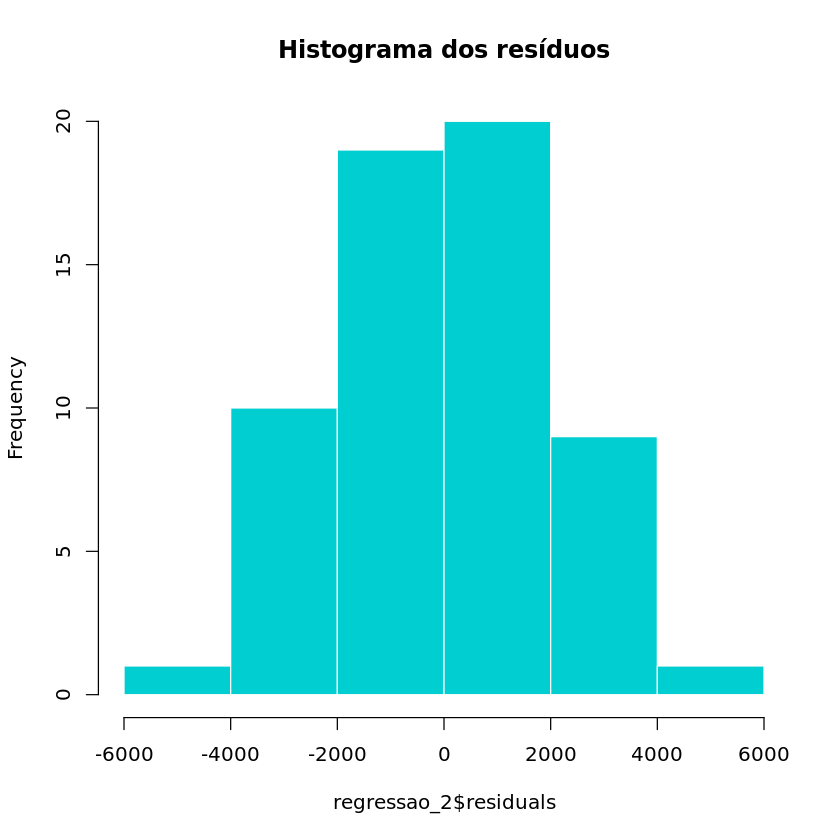

In [20]:
# Histograma dos resíduos
hist(x      = regressao_2$residuals,
     main   = "Histograma dos resíduos",
     col    = "darkturquoise",
     border = "white")

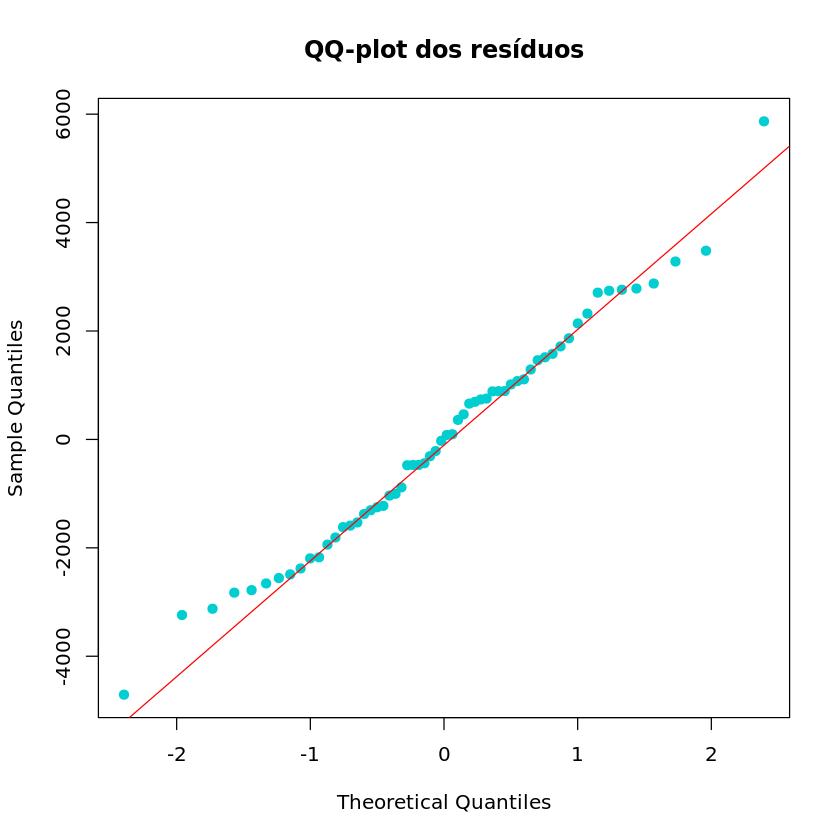

In [21]:
# QQ plot dos resíduos
qqnorm(y    = regressao_2$residuals,
       main = "QQ-plot dos resíduos",
       col  = "darkturquoise",
       pch  = 19)
qqline(y    = regressao_2$residuals,
       col  = "red")

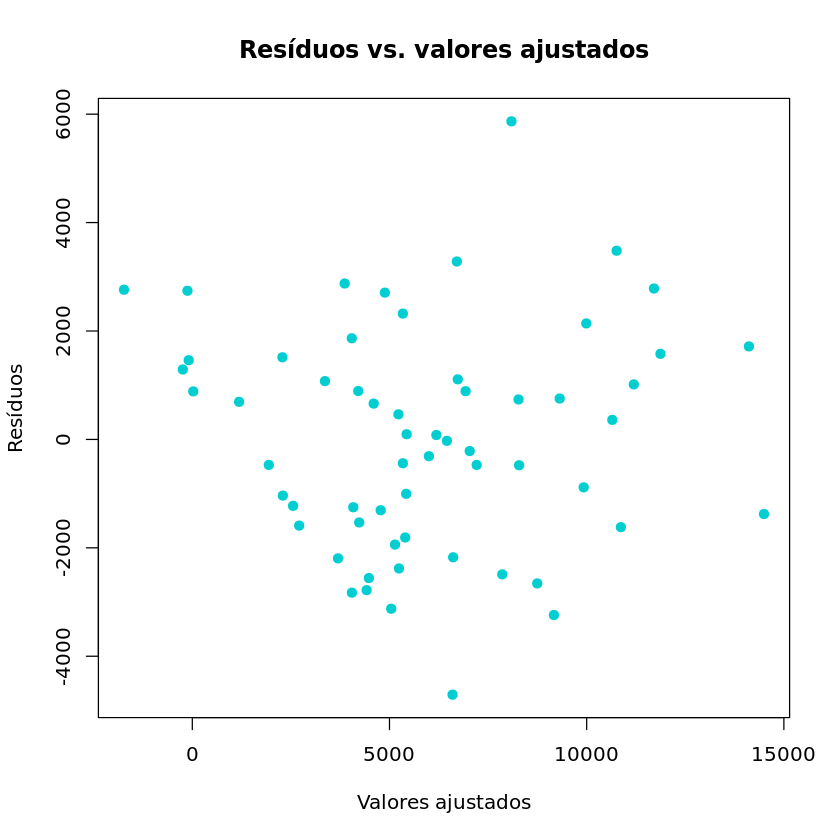

In [22]:
# Resíduos vs. valores preditos
plot(x    = regressao_2$fitted.values,
     y    = regressao_2$residuals,
     pch  = 19,
     col  = "darkturquoise",
     xlab = "Valores ajustados",
     ylab = "Resíduos",
     main = "Resíduos vs. valores ajustados")

### Exemplo de uso (aplicação) do modelo

In [23]:
# Criação de base de dados com uma nova unidade no litoral, que recebeu em média 3.000 clientes por mês de jan a nov,
# tem nota média igual a 9 para os três aspectos avaliados e tempo de espera médio de 20’
# Obs.: os nomes das colunas devem ser idênticos aos da base utilizada para construção do modelo
novos_dados <- data.frame(FLAG_LITORAL         = c(1),
                          TEMPO_MED_ESPERA     = c(20),
                          QTDE_MED_CLIENTES    = c(3000),
                          NOTA_MED_COMIDA      = c(9),
                          NOTA_MED_ATENDIMENTO = c(9),
                          NOTA_MED_AMBIENTE    = c(9))

In [24]:
# Aplicação do modelo
novos_dados$QTDE_CLIENTES_DEZ_PREDITO <- predict(regressao_2, novos_dados)
View(novos_dados)

FLAG_LITORAL,TEMPO_MED_ESPERA,QTDE_MED_CLIENTES,NOTA_MED_COMIDA,NOTA_MED_ATENDIMENTO,NOTA_MED_AMBIENTE,QTDE_CLIENTES_DEZ_PREDITO
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20,3000,9,9,9,10218.48
